In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [20]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target'])
print("target_names: "+str(iris['target_names']))
iris_data = pd.concat([x,y], axis=1)
#選三個欄位
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]#把target弄0or1
iris_data.head(4)#只有顯示前4 row

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size = 0.3, random_state=0)

In [44]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [45]:
from sklearn.svm import SVC

In [46]:
svm = SVC(kernel='linear', probability=True)

In [50]:
svm.fit(X_train_std, Y_train['target'].values)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
svm.predict(X_test_std)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [52]:
Y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [53]:
error = 0
for i, v in enumerate(svm.predict(X_test_std)):
    if v!= Y_test['target'].values[i]:
        error+=1
print(error)

0


In [54]:
svm.predict_proba(X_test_std)

array([[0.95004765, 0.04995235],
       [0.00885574, 0.99114426],
       [0.97364795, 0.02635205],
       [0.00766307, 0.99233693],
       [0.01934133, 0.98065867],
       [0.12860134, 0.87139866],
       [0.98407019, 0.01592981],
       [0.00576039, 0.99423961],
       [0.01020983, 0.98979017],
       [0.01799301, 0.98200699],
       [0.02743469, 0.97256531],
       [0.0338389 , 0.9661611 ],
       [0.0094986 , 0.9905014 ],
       [0.98020137, 0.01979863],
       [0.96237015, 0.03762985],
       [0.94249182, 0.05750818],
       [0.98803353, 0.01196647],
       [0.87832231, 0.12167769],
       [0.98024471, 0.01975529],
       [0.95658378, 0.04341622],
       [0.95004765, 0.04995235],
       [0.03888546, 0.96111454],
       [0.9500118 , 0.0499882 ],
       [0.04167215, 0.95832785],
       [0.96735426, 0.03264574],
       [0.96963062, 0.03036938],
       [0.9623429 , 0.0376571 ],
       [0.02385319, 0.97614681],
       [0.04461789, 0.95538211],
       [0.00714873, 0.99285127]])

In [64]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

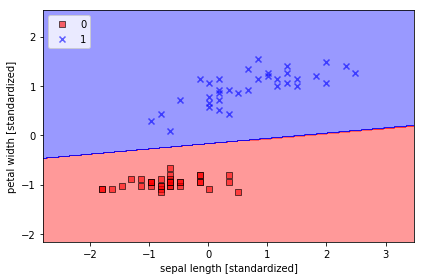

In [65]:
plot_decision_regions(X_train_std, Y_train['target'].values, classifier=svm)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()